# Изучение рынка игр

### Задача

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры.

### Содержание исследования

1. Ознакомление с данными
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод по исследованию.

### 1. Загрузка данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.ticker as ticker

#убираем предупреждения jupyter
import warnings
warnings.filterwarnings('ignore')

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = ('/datasets/')
games_data = pd.read_csv(path + 'games.csv')

In [3]:
games_data.info()
games_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16715 non-null  int64  
 1   Name             16713 non-null  object 
 2   Platform         16715 non-null  object 
 3   Year_of_Release  16446 non-null  float64
 4   Genre            16713 non-null  object 
 5   NA_sales         16715 non-null  float64
 6   EU_sales         16715 non-null  float64
 7   JP_sales         16715 non-null  float64
 8   Other_sales      16715 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  User_Score       10014 non-null  object 
 11  Rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывод таблицы и информации о ней показали, что в таблице достаточно много пропусков, а также в таблице имеются некорректные типы данных, которые необходимо будет исправить. 

Больше никаких ошибок на первый взгляд не было обнаружено.

### 2. Предобработка данных

In [4]:
#приведение названия столбцов к нижнему регистру
games_data.columns = games_data.columns.str.lower()
games_data.head()

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#перевод формата данных user_score в числовой формат
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')

In [6]:
#удаление строк с пропусками в колонке Года релиза и замена на формат integer
games_data.dropna(subset = ['year_of_release'], inplace = True)
games_data['year_of_release'] = games_data['year_of_release'].astype('int')

In [7]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       16446 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16446 non-null  object 
 3   year_of_release  16446 non-null  int64  
 4   genre            16444 non-null  object 
 5   na_sales         16446 non-null  float64
 6   eu_sales         16446 non-null  float64
 7   jp_sales         16446 non-null  float64
 8   other_sales      16446 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           9768 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [8]:
#удаление строк с пропусками в колонке с названиями игр
games_data.dropna(subset = ['name'], inplace = True)

In [9]:
#проверка на наличие дубликатов
games_data.duplicated().sum()

0

In [10]:
#добавление колонки с суммарными продажами по всем регионам
games_data['sum_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

In [11]:
#удаление строк с нулевыми значениями по суммарным продажам
games_data = games_data[games_data['sum_sales'] != 0]

In [12]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       16442 non-null  int64  
 1   name             16442 non-null  object 
 2   platform         16442 non-null  object 
 3   year_of_release  16442 non-null  int64  
 4   genre            16442 non-null  object 
 5   na_sales         16442 non-null  float64
 6   eu_sales         16442 non-null  float64
 7   jp_sales         16442 non-null  float64
 8   other_sales      16442 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           9768 non-null   object 
 12  sum_sales        16442 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 1.8+ MB


В ходе предобработки данных была произведена замена названий столбцов, они приведены к нижнему регистру. Данные в колонке о пользовательских оценках переведены из формата object в числовой формат float для дальнейших корректных манипуляций с этими значениями. Были удалены строки с пропусками по годам, так как далее потребуется построение диаграм по годам. Количество таких строк составлял незначительный процент от всех данных, поэтому их удаление не повлияет на результаты исследования. Также колонка с годами была переведена в числовой формат integer. Были устранены строки с пропусками в колонке названий игр. Таблица была проверена на наличие дубликатов, и они не были обнаружены. Больше никакие пропуски не были заменены, потому что значения с оценками критиков, пользователей и рейтингом ESRB невозможно заменить на какое-либо среднее или медианное значение, эту информацию невозможно предсказать, поэтому необходимо работать с имеющейся информацией.

В таблицу была добавлена колонка с суммарными продажами по всем регионам и удалены строки, в которых суммарные продажи составили 0. Во-первых, таких значений также было незначительное количество; во-вторых, игры, которые совсем не продавались, не отобразят никаких результатов в исследовании (напротив, могут только помешать и сместить средние значения или другие данные).

### 3. Исследовательский анализ данных

Text(0.5, 1.0, 'График выпуска игр по годам')

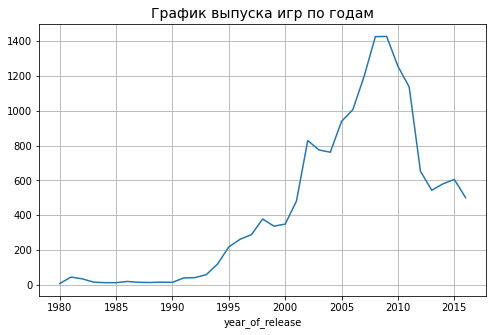

In [13]:
#график выпуска игр по годам
games_data.pivot_table(index = 'year_of_release', values = 'name', 
                       aggfunc = 'count').plot(figsize = (8,5), grid = True, legend = False)
plt.title('График выпуска игр по годам', fontsize = 14)

In [14]:
#суммарные продажи по платформам
platform_sales = games_data.pivot_table(index = 'platform', values = 'sum_sales', 
                       aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False).reset_index()
platform_sales.head(10)

,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [15]:
#выделение платформ с наибольшими суммарными продажами (> 300 млн. долл.)
platform_dict = platform_sales[platform_sales['sum_sales'] > 300]['platform'].unique().tolist()

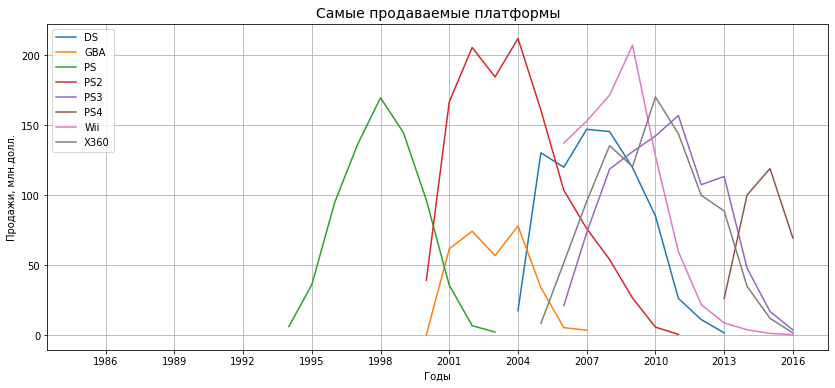

In [16]:
#самые продаваемые платформы по годам и построение графика для них
profit_platform_sales = pd.pivot_table(games_data.query('platform in @platform_dict'), 
                                       index = 'year_of_release', columns = 'platform', values = 'sum_sales',
                                       aggfunc = 'sum')
ax = profit_platform_sales.plot(grid = True, figsize = (14,6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.xlabel('Годы')
plt.ylabel('Продажи, млн.долл.')
plt.title('Самые продаваемые платформы', fontsize=14)
plt.legend(loc='upper left') 

In [17]:
#построение сводной с суммарными продажами по годам для самых продаваемых платформ
platform_life = pd.pivot_table(games_data.query('platform in @platform_dict'),
               index = ['platform', 'year_of_release'],
               values = 'sum_sales',
               aggfunc = 'sum').reset_index()

#средняя продолжительность жизненного цикла платформы (берутся года, когда платформа зарабатывала > 25 млн.долл.)
print('Cредняя продолжительность жизненного цикла платформы: {} лет'.format(platform_life[platform_life['sum_sales'] > 25]['platform'].value_counts().mean()))

Cредняя продолжительность жизненного цикла платформы: 7.0 лет


In [18]:
#определение актуального периода
actual_data = games_data.query('year_of_release >= 2010')

Text(0.5, 1.0, 'Распределение продаж по платформам за актуальные годы')

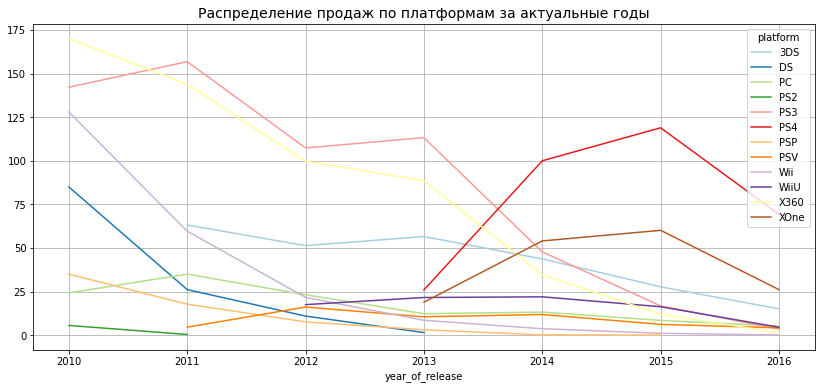

In [19]:
ax = sns.set_palette('Paired', 12)
ax = pd.pivot_table(actual_data, index = 'year_of_release', columns = 'platform', values = 'sum_sales', 
               aggfunc = 'sum').plot(grid = True, figsize = (14,6))
plt.title('Распределение продаж по платформам за актуальные годы', fontsize = 14)

In [20]:
popular_platform = ['PS4', 'XOne', '3DS', 'WiiU']

In [21]:
#отбрасываем игры, которые плохо продавались (< 2 млн. долл.), чтобы не влияли на графики 
games_pivot = (actual_data
              .pivot_table(index = 'name', values = 'sum_sales', aggfunc = 'sum')
              .reset_index()
              .query('sum_sales > 2')
             )
games_dict = games_pivot['name'].unique()

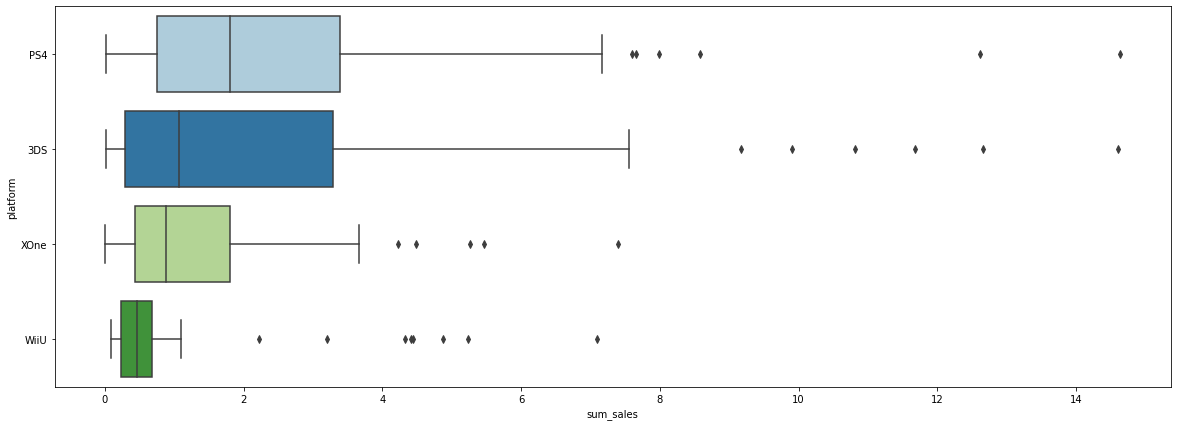

In [22]:
plt.figure(figsize=(20,7))
(sns.boxplot(x = 'sum_sales', y = 'platform', data = actual_data[['name', 'platform', 'sum_sales']]
          .query('name in @games_dict and platform in @popular_platform'))
)
plt.show()

Корреляция пользовательских оценок и оценок критиков с суммарными продажами для PS4


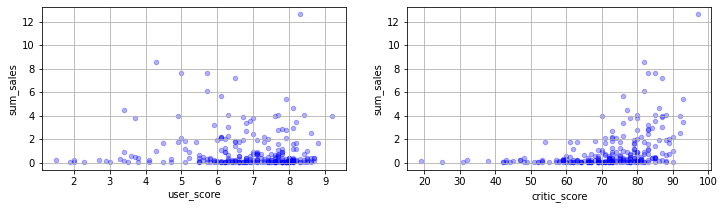

              critic_score  user_score  sum_sales
critic_score      1.000000    0.557654   0.406568
user_score        0.557654    1.000000  -0.031957
sum_sales         0.406568   -0.031957   1.000000

Корреляция пользовательских оценок и оценок критиков с суммарными продажами для 3DS


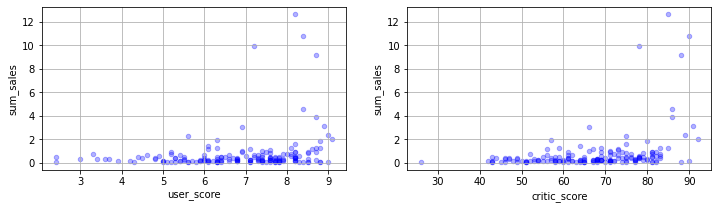

              critic_score  user_score  sum_sales
critic_score      1.000000    0.745222   0.348740
user_score        0.745222    1.000000   0.222078
sum_sales         0.348740    0.222078   1.000000

Корреляция пользовательских оценок и оценок критиков с суммарными продажами для XOne


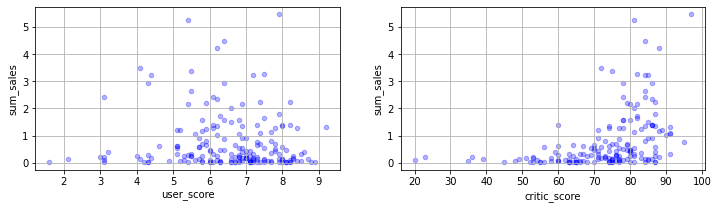

              critic_score  user_score  sum_sales
critic_score      1.000000    0.472462   0.416998
user_score        0.472462    1.000000  -0.068925
sum_sales         0.416998   -0.068925   1.000000

Корреляция пользовательских оценок и оценок критиков с суммарными продажами для WiiU


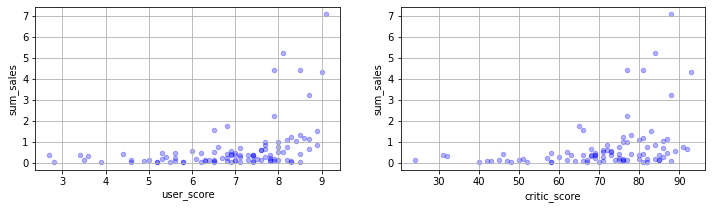

              critic_score  user_score  sum_sales
critic_score       1.00000    0.770080   0.348380
user_score         0.77008    1.000000   0.400219
sum_sales          0.34838    0.400219   1.000000



In [23]:
#построение графиков корреляции продаж и оценок для каждой популярной платформы
for row in actual_data.query('platform in @popular_platform').platform.unique():
    fig, ax = plt.subplots(figsize = (12,3))
    data = actual_data.query('platform == @row')
    print('Корреляция пользовательских оценок и оценок критиков с суммарными продажами для', row)
    data.plot(x='user_score',y='sum_sales',kind='scatter', ax = plt.subplot(1, 2, 1), grid = True, color = 'blue', alpha = 0.3)
    data.plot(x='critic_score',y='sum_sales',kind='scatter', ax = plt.subplot(1, 2, 2), grid = True, color = 'blue', alpha = 0.3)
    plt.show()
    print(data[['critic_score', 'user_score', 'sum_sales']].corr())
    print()

Корреляция пользовательских оценок и оценок критиков с суммарными продажами для популярных платформ


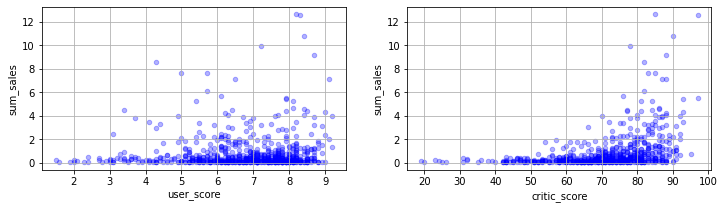

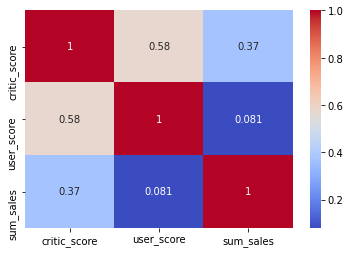

In [24]:
#построение графиков корреляции продаж и оценок для всех популярных платформ
data = actual_data.query('platform in @popular_platform')
print('Корреляция пользовательских оценок и оценок критиков с суммарными продажами для популярных платформ')
fig, ax = plt.subplots(figsize = (12,3))
data.plot(x='user_score',y='sum_sales',kind='scatter', ax = plt.subplot(1, 2, 1), grid = True, color = 'blue', alpha = 0.3)
data.plot(x='critic_score',y='sum_sales',kind='scatter', ax = plt.subplot(1, 2, 2), grid = True, color = 'blue', alpha = 0.3)
plt.show()
sns.heatmap(data[['critic_score', 'user_score', 'sum_sales']].corr(),cmap='coolwarm',annot=True)

Корреляция пользовательских оценок и оценок критиков с суммарными продажами для менее популярных платформ


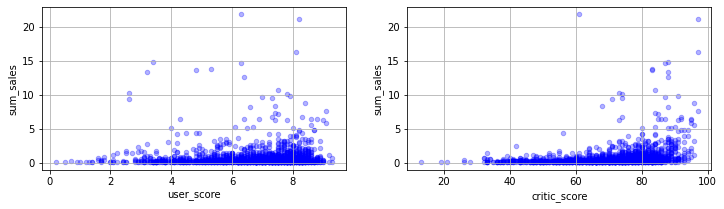

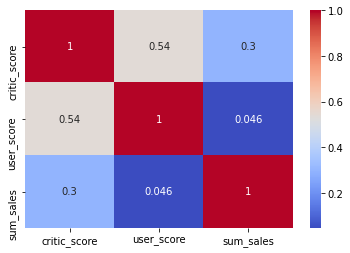

In [25]:
#построение графиков корреляции продаж и оценок для остальных платформ
data = actual_data.query('platform not in @popular_platform')
print('Корреляция пользовательских оценок и оценок критиков с суммарными продажами для менее популярных платформ')
fig, ax = plt.subplots(figsize = (12,3))
data.plot(x='user_score',y='sum_sales',kind='scatter', ax = plt.subplot(1, 2, 1), grid = True, color = 'blue', alpha = 0.3)
data.plot(x='critic_score',y='sum_sales',kind='scatter', ax = plt.subplot(1, 2, 2), grid = True, color = 'blue', alpha = 0.3)
plt.show()
sns.heatmap(data[['critic_score', 'user_score', 'sum_sales']].corr(),cmap='coolwarm',annot=True)

Text(0.5, 1.0, 'График распрделения продаж по жанрам')

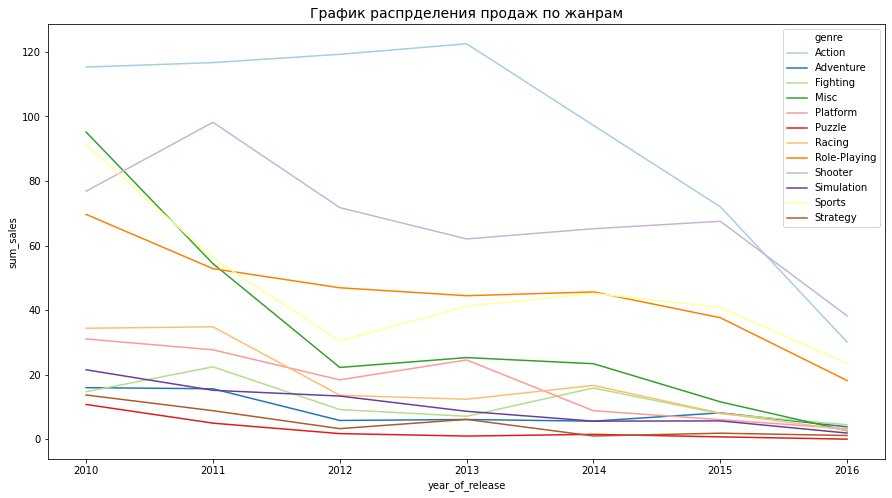

In [26]:
#построение графика распрделения продаж по жанрам
genre_info = actual_data.pivot_table(index = ['genre', 'year_of_release'], values = 'sum_sales', 
                                     aggfunc = 'sum').reset_index()
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.lineplot(x='year_of_release', y='sum_sales', hue='genre', data=genre_info)
plt.title('График распрделения продаж по жанрам',fontsize = 14)

### Вывод

По графику выпуска игр можно сказать, что активный рост выпуска игр начинается примерно в 1995 году и его пик достигается в 2008-2009 гг., далее количество выпускаемых игр идет на спад, однако это можно связать с тем, что в 2000-2010 гг. было много конкурирующих популярных платформ, поэтому у производителей игр был обширный выбор на рынке. Далее многие платформы утратили свою популярность, поэтому и количество выпускаемых игр тоже начало снижаться.

Далее были выбраны наиболее прибыльные платформы (с суммарными продажами больше 300 млн. долл.) и построен график суммарных продаж игр для них. По нему можно отчетливо увидеть, что каждая платформа имеет на протяжении 5-10 лет рост-пик-падение в продажах. Далее был определен приблизительный жизненный цикл каждой платформы (среднее значение количества годов, когда у популярных платформ суммарные продажи были больше 25 млн. долл.). Таким образом, срок появления и упадка платформ составил 7 лет. На основе полученного значения был определен актуальный период данных для дальнейшего исследования: 2010 - 2016 гг.

Несмотря на то, что продажи по многим платформам стабильно падают, график продаж по платформам для актуального периода показал, что все-таки существуют платформы, которые потенциально прибыльнее остальных. Такими платформами оказались PS4, XOne, 3DS, а также WiiU (данная платформа была включена в эту группу, так как появилась только в 2012 году и имеет потенциал и время для развития). 

Далее были отброшены игры, которые практически не продавались (с суммарными продажами меньше 2 млн. долл.). По выбранным потенциальным платформам и отфильтрованным играм были построенны диаграммы "ящик с усами". Продажи для платформ PS4 и 3DS незначительно отличаются, однако медиана показывает, что в целом для PS4 суммарные продажи выше. Хотя межкавартильный размах для платформы XOne гораздо меньше, чем у 3DS, но медианы у них примерно на одинаковом уровне. Очень сильно в этой группе отличаются продажи у платформы WiiU, так как платформа достаточно "молодая" и также на предыдущих графиках продаж показывала плавные результаты.

Если посмотреть на зависимость между оценками критиков и суммарными продажами, то и для популярных платформ, и для остальных платформ эта зависимость положительная, но не особо сильная, ниже средней. Хотя для популярных платформ этот показатель все же выше (0.37 против 0.3), то есть пользователи популярных платформ больше ориентируются на мнение критиков при покупке игр, чем пользователи других платформ. Корреляция между оценками пользователей и суммарными продажами достаточно слабая для популярных и других платформ. Однако, если рассмотреть популярные платформы по отдельности, то можно заметить, что эта зависимость для платформ 3DS и WiiU положительная и в районе 0.2-0.3 (ниже среднего), то есть пользователи ориентируются при покупке игр на оценки других игроков. С популярными платформами PS4 и XOne другая ситуация, у них зависимость слабая отрицательная, то есть можно сказать, что пользователи не особо ориентируются на отзывы других игроков, погупают игры и, разочаровавшись в них, ставят низкие оценки.

Среди продаж по жанрам значительно выделяются такие жанры как Action, Shooter, Sports и Role-Playing. Остальные жанры менее прибыльные и их графики лежат достаточно близко друг к другу, но можно выделить 2 наименее популярных жанра: Puzzle и Strategy.

### 4. Составление портрета пользователя каждого региона

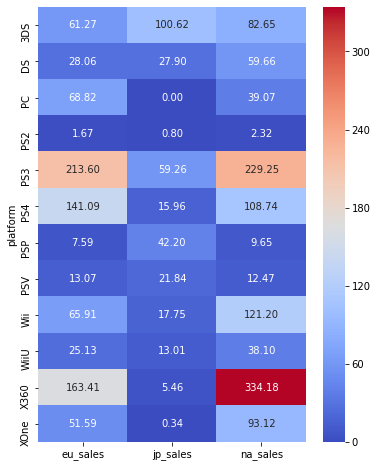

In [27]:
#продажи игр для каждой платформы по регионам
region_sales = actual_data.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], 
                                  aggfunc = 'sum')
fig, ax = plt.subplots(figsize = (6,8))
sns.heatmap(region_sales, cmap='coolwarm', annot=True, fmt='.2f')

In [28]:
#определение топ-5 платформ в Европе
eu_top_5_platform = region_sales.reset_index().sort_values(by = 'eu_sales', 
                                                           ascending = False).head(5).platform.unique()
print(eu_top_5_platform)

#определение топ-5 платформ в Японии
jp_top_5_platform = region_sales.reset_index().sort_values(by = 'jp_sales', 
                                                           ascending = False).head(5).platform.unique()
print(jp_top_5_platform)

#определение топ-5 платформ в Северной Америке
na_top_5_platform = region_sales.reset_index().sort_values(by = 'na_sales', 
                                                           ascending = False).head(5).platform.unique()
print(na_top_5_platform)

['PS3' 'X360' 'PS4' 'PC' 'Wii']
['3DS' 'PS3' 'PSP' 'DS' 'PSV']
['X360' 'PS3' 'Wii' 'PS4' 'XOne']


In [29]:
#создание сводной таблицы с долями продаж в каждом регионе
top5_sales_pivot = actual_data.pivot_table(index = 'platform', 
                                           values = ['na_sales', 'eu_sales', 'jp_sales', 'sum_sales'], 
                                           aggfunc = 'sum').reset_index()
top5_sales_pivot['na_share'] = top5_sales_pivot['na_sales'] / top5_sales_pivot['sum_sales']
top5_sales_pivot['eu_share'] = top5_sales_pivot['eu_sales'] / top5_sales_pivot['sum_sales']
top5_sales_pivot['jp_share'] = top5_sales_pivot['jp_sales'] / top5_sales_pivot['sum_sales']

#выделение среза с топ-5 платформами по каждому региону
eu_top5_sales = top5_sales_pivot.query('platform in (@eu_top_5_platform)')
jp_top5_sales = top5_sales_pivot.query('platform in (@jp_top_5_platform)')
na_top5_sales = top5_sales_pivot.query('platform in (@na_top_5_platform)')

#название для каждого среза
eu_top5_sales.name = 'Европа'
jp_top5_sales.name = 'Япония'
na_top5_sales.name = 'Северная Америка'

In [30]:
#функция для создания столбчатой диаграммы  с долями продаж в каждом регионе
def region_chart(data):
    x = np.arange(len(data['platform']))
    width = 0.25
    fig, ax = plt.subplots(figsize = (15,5))
    sales_1 = ax.bar(x - width, data['na_share'], width, label='North America')
    sales_2 = ax.bar(x, data['eu_share'], width, label='Europe')
    sales_3 = ax.bar(x + width, data['jp_share'], width, label='Japan')
    ax.set_ylabel('Доли продаж')
    ax.set_xlabel('Платформы')
    ax.set_title('Доли продаж топ-5 платформ ({: ^0}) по регионам'.format(data.name))
    ax.set_xticks(x)
    ax.set_xticklabels(data['platform'])
    ax.legend()

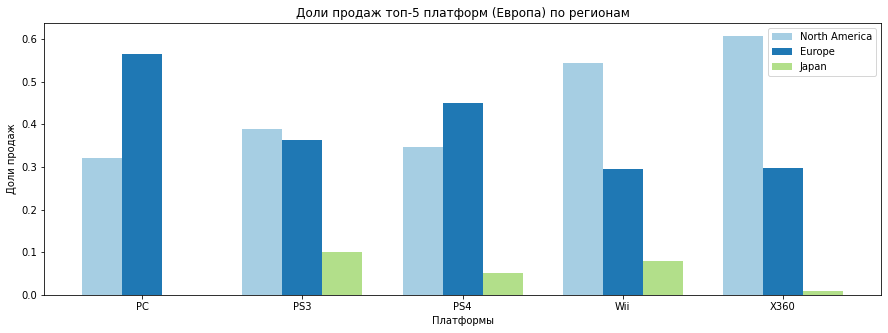

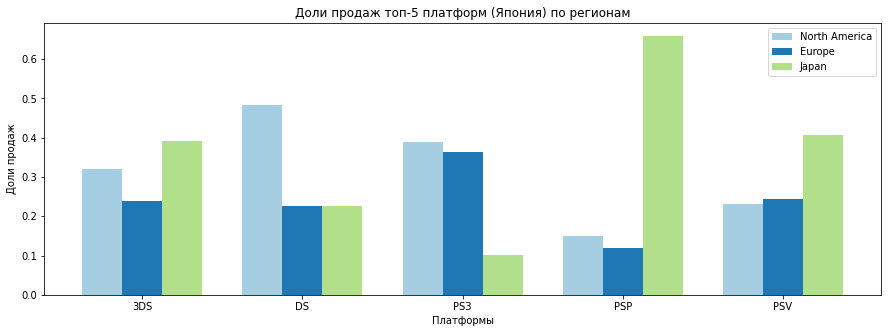

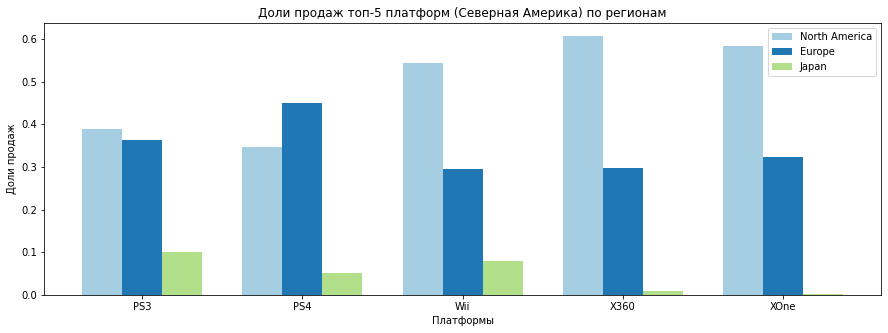

In [31]:
#применение функции на срезы по регионам
region_chart(eu_top5_sales)
region_chart(jp_top5_sales)
region_chart(na_top5_sales)

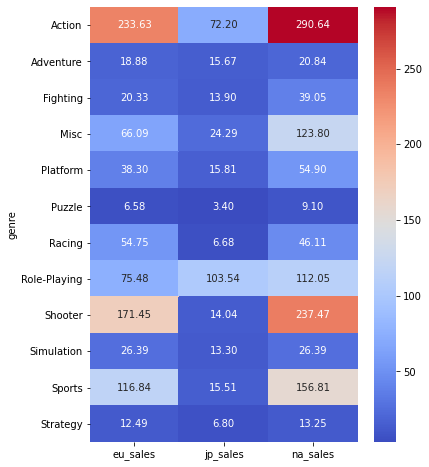

In [32]:
#продажи игр разных жанров по регионам
genre_sales = actual_data.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], 
                        aggfunc = 'sum')
fig, ax = plt.subplots(figsize = (6,8))
sns.heatmap(genre_sales, cmap='coolwarm', annot=True, fmt='.2f')

In [33]:
#определение топ-5 жанров в Европе
eu_top_5_genres = genre_sales.reset_index().sort_values(by = 'eu_sales', 
                                                           ascending = False).head(5).genre.unique()
print(eu_top_5_genres)


#определение топ-5 жанров в Северной Америке
na_top_5_genres = genre_sales.reset_index().sort_values(by = 'na_sales', 
                                                           ascending = False).head(5).genre.unique()
print(na_top_5_genres)

#определение топ-5 жанров в Японии
jp_top_5_genres = genre_sales.reset_index().sort_values(by = 'jp_sales', 
                                                           ascending = False).head(5).genre.unique()
print(jp_top_5_genres)

['Action' 'Shooter' 'Sports' 'Role-Playing' 'Misc']
['Action' 'Shooter' 'Sports' 'Misc' 'Role-Playing']
['Role-Playing' 'Action' 'Misc' 'Platform' 'Adventure']


In [34]:
#сводная таблица с продажами игр разных рейтингов по регионам
rating_region_pivot = pd.pivot_table(data = actual_data.query('rating.notna().values'), 
                                  index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales', 'sum_sales'], 
                                  aggfunc = 'sum').reset_index()
rating_region_pivot

,rating,eu_sales,jp_sales,na_sales,sum_sales
0,E,197.34,47.87,271.15,576.40
1,E10+,99.28,13.22,159.38,303.03
2,EC,0.00,0.00,1.13,1.20
3,M,292.04,30.45,382.22,801.69
4,RP,0.03,0.00,0.00,0.04
5,T,113.08,42.11,160.81,354.72


In [35]:
actual_data['rating'].value_counts()

E       938
T       847
M       719
E10+    603
EC        5
RP        1
Name: rating, dtype: int64

                                   Продажи игр с разными рейтингами по регионам                                    


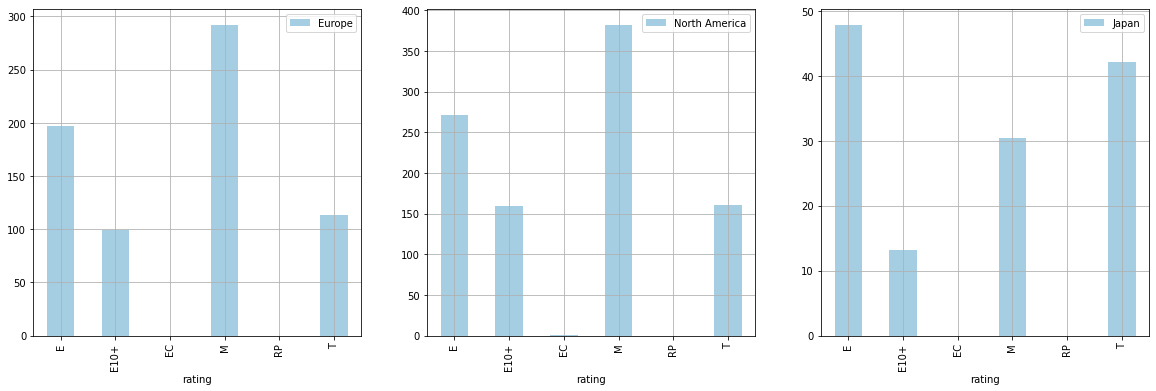

In [36]:
#графики продаж игр разных рейтингов по регионам
fig, ax = plt.subplots(figsize = (20,6))
print('{: ^115}'.format('Продажи игр с разными рейтингами по регионам'))
rating_region_pivot.plot(x='rating',y='eu_sales',kind='bar', ax = plt.subplot(1, 3, 1), grid = True, label = 'Europe')
rating_region_pivot.plot(x='rating',y='na_sales',kind='bar', ax = plt.subplot(1, 3, 2), grid = True, label = 'North America')
rating_region_pivot.plot(x='rating',y='jp_sales',kind='bar', ax = plt.subplot(1, 3, 3), grid = True, label = 'Japan')
plt.show()

### Вывод

У пользователей разных регионов (Европы, Северной Америки, Японии) определились разные топ-5 платформ. 

В Японии наибольшей популярностью пользуются компактные карманные игровые приставки (3DS, PSP, DS, PSV). У платформ 3DS, PSP, PSV в целом в Японии наибольшие доли продаж. Это может быть обусловалено японской игровой культурой и маленькими квартирами в Японии, потому что пользователям негде разместить полноценную игровую приставку дома. 

У пользователей из Европы и Северной Америки большой популярностью пользуются крупные игровые приставки, которые можно разместить дома (PS3, X360, PS4, PC, Wii, XOne), причем платформы компании Sony больше популярны в Европе, а платформы Xbox компании Microsoft больше популярны в Северной Америке.

Топ-5 игровых жанров в Северной Америке и Европе одинаковые, у пользователей этих регионов схожие игровые вкусы. У японских игроков немного отличается список топ-5 жанров: вместо жанров Sports и Shooter у них появились Platform и Adventure. На компактных игровых платформах достаточно много игр этих жанров, поэтому данный топ-5 также может быть связан с вышеописанным топ-5 популярных платформ.

Существует несколько рейтингов ESRB, присваеваемых играм:
* EC («Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше)
* E («Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше)
* E10+ («Для всех от 10 лет и старше»)
* T («Подросткам»: Игра подходит для лиц от 13 лет и старше)
* M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет)
* RP («Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга)

Игры с рейтингами EC и RP представлены в очень малом количестве (5 и 1 соответственно), поэтому на столбчатых диаграммах они практически не выделяются. 

Что касается остальных рейтингов игр, то здесь также наблюдается схожая ситуация, что и с топ-5 платформами и топ-5 жанрами: у пользователей Европы и Северной Америки схожие вкусы. Наибольшей популярностью в этих регионах пользуются игры рейтинга M, после них по популярности идут игры рейтинга E. В данных регионах основными пользователями игровых платформ являются либо взрослые старше 17 лет, которые предпочитают игры с элементами насилия, либо дети и семейные люди с детьми, которые предпочитают игры для всех возрастов, то есть для всей семьи.

В Японии популярными рейтингами являются E и Т, то есть можно сказать, что в Японии более молодая возрастная аудитория. Также пользователи предпочитают меньше элементов насилия в играх.

### 5. Проверка гипотез

##### Гипотеза 1

Были сформулированы две гипотезы:
* Нулевая гипотеза (H0): средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Альтернативная гипотеза (H1): средние пользовательские рейтинги платформ Xbox One и PC отличаются

Будет производиться проверка гипотезы о равенстве средних двух генеральных совокупностей, поэтому будет использоваться метод scipy.stats.ttest_ind.

In [37]:
pc_platform = actual_data.query('user_score.notna().values and platform == "PC"')
xbox_one_platform = actual_data.query('user_score.notna().values and platform == "XOne"')

In [38]:
alpha = 0.05


user_score_platform_test = st.ttest_ind(pc_platform['user_score'], xbox_one_platform['user_score']) 

print('p-значение:', user_score_platform_test.pvalue)

#сравнение результата с уровнем значимости и принятие решения
if (user_score_platform_test.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

#вывод средних значений пользовательских оценок
print()    
print('Средний пользовательский рейтинг для PC:', pc_platform['user_score'].mean())
print('Средний пользовательский рейтинг для Xbox One:', xbox_one_platform['user_score'].mean())

p-значение: 0.980998110649032
Не получилось отвергнуть нулевую гипотезу

Средний пользовательский рейтинг для PC: 6.518181818181822
Средний пользовательский рейтинг для Xbox One: 6.52142857142857


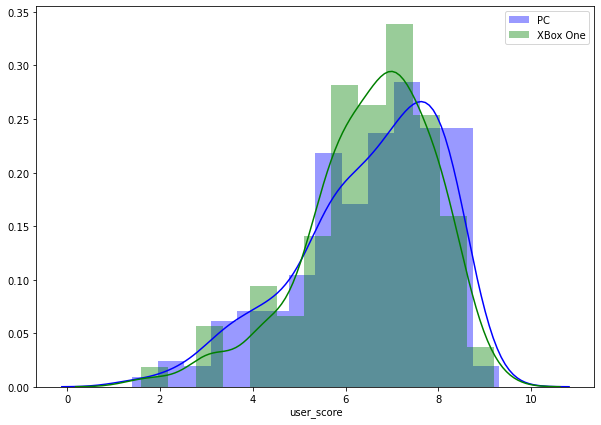

In [39]:
plt.figure(figsize=(10,7))
sns_plot = sns.distplot(pc_platform['user_score'], color = 'blue', label = 'PC')
sns_plot = sns.distplot(xbox_one_platform['user_score'], color = 'green', label = 'XBox One')
plt.legend()
plt.show()

##### Гипотеза 2

Были сформулированы две гипотезы:
* Нулевая гипотеза (H0): средние пользовательские рейтинги жанров Action и Sports одинаковые
* Альтернативная гипотеза (H1): средние пользовательские рейтинги жанров Action и Sports разные

Будет производиться проверка гипотезы о равенстве средних двух генеральных совокупностей, поэтому будет использоваться метод scipy.stats.ttest_ind.

In [40]:
action_games = actual_data.query('user_score.notna().values and genre == "Action"')
sports_games = actual_data.query('user_score.notna().values and genre == "Sports"')

In [41]:
alpha = 0.05

user_score_genre_test = st.ttest_ind(action_games['user_score'], sports_games['user_score'])

print('p-значение:', user_score_genre_test.pvalue)

#сравнение результата с уровнем значимости и принятие решение
if (user_score_genre_test.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print()    
print('Средний пользовательский рейтинг для жанры игр Action:', action_games['user_score'].mean())
print('Средний пользовательский рейтинг для жанра игр Sports:', sports_games['user_score'].mean())

p-значение: 7.839124224330309e-19
Отвергаем нулевую гипотезу

Средний пользовательский рейтинг для жанры игр Action: 6.781899871630309
Средний пользовательский рейтинг для жанра игр Sports: 5.901587301587301


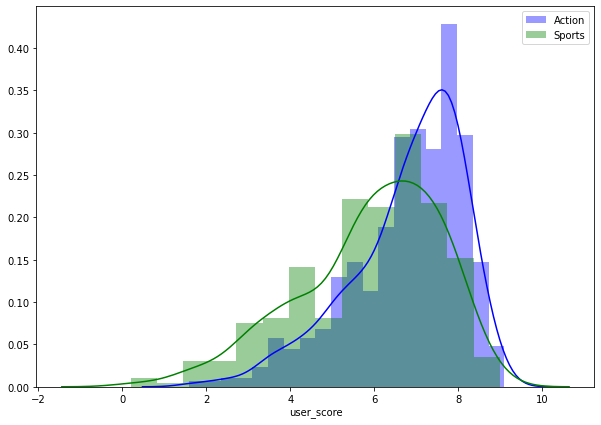

In [42]:
plt.figure(figsize=(10,7))
sns_plot = sns.distplot(action_games['user_score'], color = 'blue', label = 'Action')
sns_plot = sns.distplot(sports_games['user_score'], color = 'green', label = 'Sports')
plt.legend()
plt.show()

### Вывод

Была проведена проверка двух статистических гипотез:
* О равенстве средних пользовательских оценок платформ Xbox One и PC
* О разности средних пользовательских оценок жанров Action и Sports

Необходимо было выбрать критический уровень статистической значимости, который позволит избежать ошибки первого рода. Чаще всего используются 0.005, 0.01, 0.05. Однако, в случае принятия уровня значимости 0.005 велика вероятность ошибки второго рода (можно принять нулевую гипотезу в то время, как она не верна). Уровень значимости 0.01 принято использовать в генетике, а в эконометрике и других областях как правило используют 0.05. Именно он и был использован при проверке гипотез о пользовательских оценках платформ и игровых жанров.

Так как использовались двухсторонние гипотезы, то также были выведены средние значения по проверяемым параметрам для понимания разницы между ними.

Таким образом, проверка первой гипотезы о равенстве средних пользовательских оценок платформ Xbox One и PC показала значение приблизительно 0.323. Полученное значение p-value говорит о том, что с вероятностью в почти 32,3% возможное различие могло быть получено случайно. Такая вероятность не позволила отвергнуть нулевую гипотезу. Дальнейший вывод средних значений также не показал больших различий. Также была построена кривая плотности с гистограммой для этих данных. На ней можно увидеть что распределения незначительно отличаются, что также подверждает вышеописанный вывод.

Далее была проведена проверка второй гипотезы о разности средних пользовательских оценок жанров Action и Sports. Так как нулевая гипотеза всегда идет со знаком равенства, поэтому в качестве нулевой гипотезы было принято равенство средних значений двух жанров, а в качестве альтернативной - средние пользовательские оценки этих жанров не равны. Полученное значение оказалось крайне маленьким и было значительно меньше критического уровня значимости, что позволило отвергнуть нулевую гипотезу. Выведенные далее средние значения подтвердили это и показали, что пользовательские оценки жанра Action выше пользовательских оценок жанра Sports. Такой же вывод позволила сделать и построенная кривая плотности, на которой видно, что пик у жанра Action выше.

### 6. Общий вывод

Было произведено исследование данных об игровых платформах и продаже игр по разным регионам (Европа, Северная Америка, Япония).

Первыми шагами было исследование данных в таблицах, скорректированы типы данных, названия столбцов приведены к нижнему регистру. В таблицу была добавлена колонка с суммарными продажами по всем регионам. Были удалены данные с пропусками в колонках год выпуска и название игры, а также с нулевыми суммарными продажами. Больше никакие пропуски не были заменены, потому что значения с оценками критиков, пользователей и рейтингом ESRB невозможно заменить на какое-либо рассчитанное значение.

Далее были изучены данные о продажах по разным платформам. Был определен срок появление и исчезновения игровой платформы, он составил 7 лет. Именно на основе этого значения был определен актуальный период для дальнейшего исследовани: 2010 - 2016 гг. Было выявлено, что потенциально прибыльными платформами являются PS4, XOne, 3DS, а также WiiU (данная платформа была включена в эту группу, так как появилась только в 2012 году и имеет потенциал и время для развития).

Среди продаж по жанрам значительно выделяются такие жанры как Action, Shooter, Sports и Role-Playing. Остальные жанры менее прибыльные и их графики лежат достаточно близко друг к другу, но можно выделить 2 наименее популярных жанра: Puzzle и Strategy.

Анализ пользователей разных регионов показал, что игроки из Европы и Северной Америки имеют схожие вкусы, а игроки из Японии отличаются по своим предпочтениям. Так, например, европейцы и американцы предпочитают стационарные игровые консоли, а среди японцев популярностью пользуются карманные игровые приставки. Также в Европе и Северной Америке наибольшей популярностью пользуются игры с рейтингом M (для взрослых старше 17 лет), содержащие элементы насилия, в то время как японцы предпочитают игры рейтинга E и T, то есть для более молодой аудитории. 

Финальным шагом было проведение проверок двух статистических гипотез:

1. О равенстве средних пользовательских оценок платформ Xbox One и PC
2. О разности средних пользовательских оценок жанров Action и Sports

Благодаря им было обнаружено, что разницы между средними пользовательскими оценкми платформ Xbox One и PC практически нет. Из этого интернет-магазин «Стримчик» может сделать вывод о том, что ему необходимо уделять внимание играм обеих платформ, так как их игроки достаточно лояльные и приблизительно в равной степени оценивают игры для этих платформ.

Проверка гипотезы о разности средних пользовательских оценок жанров Action и Sports показала, что пользователеьские оценки этих жанров отличаются: пользовательские оценки жанра Action выше пользовательских оценок жанра Sports. Также раннее было установлено, что у жанра Action наибольшие суммарные продажи. В связи с выводом о разности пользовательских оценок, можно порекомендовать интернет-магазину «Стримчик» больше развивать жанр Action и спланировать на следующий год больший бюджет для закупки игр этого жанра, так как они пользуются хорошей популярностью среди пользователей и принесут больше выручки компании. 